# 1. Problem Statement

**Flight fare** is the price of a ticket for a flight. It is determined by a number of factors, including the airline, the route, the time of year, the demand for tickets, etc.

Flight fare prediction is the process of using historical data to predict the future price of a flight ticket. This can be useful for travelers who want to know how much a flight will cost before they book it, or for airlines who want to optimize their pricing strategies. Flight fare prediction can be a complex task, but there are a number of machine learning algorithms that can be used to make accurate predictions. These algorithms typically use historical data to train a model that can be used to predict the price of a flight ticket for a given set of input parameters.

In this notebook we will try predict the **Price** of fight's tickets with the help of the given information like **Airline**, **Date of Journey**, **Source**, **Destination**, **Route**, **Dep_Time**, **Arrival_Time**, **Duration**, **Total_Stops**, **Additional_info.**

# 2. Importing Basic Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
import xgboost as xgb

from sklearn import metrics
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV

# 3. Loading the Data

In [3]:
df= pd.read_excel('Flight_Fare.xlsx')
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


# 4. Domain Analysis

* **Airline:** An airline is a company that provides air transport services for traveling passengers and/or freight. Here in this column will have all the types of airlines like Indigo, Jet Airways, Air India, and many more.
* **Date_of_Journey:** Date of journey represents the date on which the passenger will travel.
* **Source:**  Source represents the name of the place from where the passenger’s journey will start.
* **Destination:** Destination represents the name of the place  where the passenger is arriving.
* **Route:** The term "route" refers to the path that an aircraft will take to travel from one airport to another. The route can be direct, which means that the aircraft will fly directly from the departure airport to the arrival airport without making any stops. Or, the route can be indirect, which means that the aircraft will make one or more stops along the way.
* **Dep_Time:** Dep_time refers to the departure time of the flight. It is the time when the aircraft is scheduled to depart from the airport.
* **Arrival_Time:** The arrival time in flight booking is the time when the plane is scheduled to land at its destination airport.
* **Duration:** Duration refers to the total amount of time it takes to complete the flight. This includes the time spent in the air, as well as the time spent on the ground for things like taxiing and boarding.
* **Total_stops:** Total stops refers to the number of times the plane will make a stop before reaching its final destination.
* **Additional info:** The additional information field in flight booking is used to provide the airline with additional information about the passenger, such as food, kind of food, and other amenities.
* **Price:** Price refers to the total amount spend in the ticket.

# 5. Basic checks

In [4]:
# checking the first 5 rows of the list.
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [5]:
# checking the last 5 rows of the list.
df.tail()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648
10682,Air India,9/05/2019,Delhi,Cochin,DEL → GOI → BOM → COK,10:55,19:15,8h 20m,2 stops,No info,11753


In [6]:
# checking the shape of the list (i.e no. of rows & no. of columns)
df.shape

(10683, 11)

In [7]:
# checking for the name of the columns
df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [8]:
# checking the categorical datatypes
df.select_dtypes (include= "object")

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info
...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info


In [9]:
# checking the numerical datatypes
df.select_dtypes (include= "int64")

,Price
0,3897
1,7662
2,13882
3,6218
4,13302
...,...
10678,4107
10679,4145
10680,7229
10681,12648


In [10]:
# checking the value counts of Airline column
df.value_counts('Airline')

Airline
Jet Airways                          3849
IndiGo                               2053
Air India                            1752
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
dtype: int64

In [11]:
# checking the value counts of Source column
df.value_counts('Source')

Source
Delhi       4537
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
dtype: int64

In [12]:
# checking the value counts of Destination column
df.value_counts('Destination')

Destination
Cochin       4537
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
dtype: int64

In [13]:
# checking the value counts of Route column
df.value_counts('Route')

Route
DEL → BOM → COK          2376
BLR → DEL                1552
CCU → BOM → BLR           979
CCU → BLR                 724
BOM → HYD                 621
                         ... 
CCU → IXZ → MAA → BLR       1
BOM → JAI → DEL → HYD       1
BOM → BBI → HYD             1
CCU → RPR → HYD → BLR       1
BLR → BOM → IXC → DEL       1
Length: 128, dtype: int64

In [14]:
# checking the value counts of Total_Stops column
df.value_counts('Total_Stops')

Total_Stops
1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
dtype: int64

In [15]:
# checking the value counts of Additional_Info column
df.value_counts('Additional_Info')

Additional_Info
No info                         8345
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
2 Long layover                     1
Red-eye flight                     1
dtype: int64

In [16]:
# Information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [17]:
# Checking the table for descriptive statistics of numerical column
df.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


### Insights

* The mean of the Price column is 9087.06, which is the average value of tickets.
* The standard deviation of the Price column is 4611.35, which indicates that the data is moderately spread out.
* The minimum value of the Price column is 1759, and the maximum value is 79512. This means that all of the values in the Price column are between 1759 and 79512.
* The 25th percentile of the Price column is 5277, the 50th percentile (median) is 8372, and the 75th percentile is 12373.

In [18]:
# Checking the table for descriptive statistics of categorical column
df.describe(include = "object")

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
count,10683,10683,10683,10683,10682,10683,10683,10683,10682,10683
unique,12,44,5,6,128,222,1343,368,5,10
top,Jet Airways,18/05/2019,Delhi,Cochin,DEL → BOM → COK,18:55,19:00,2h 50m,1 stop,No info
freq,3849,504,4537,4537,2376,233,423,550,5625,8345


###  Insights

* The most common Airline used by people is Jet Airways.
* The majority of the travellers has booked their tickets for 18/05/2019.
* The most popular source for travellers is Delhi.
* The most popular destination for travellers is Cochin.
* The most common Route way for passengers is DEL → BOM → COK.
* 18:55 is the most common departure time.
* 19:00 is the most common arrival time.
* 2hrs 50 mins  is the duration of the journey.
* Majority of the travellers opted for 1 stop flights.
* Majority of the passengers opted for no information.

# 6. Exploratory Data Analysis (EDA)

## A. Univariate
- Count plot is used to check the distribution of categorical data
- Hist plot is used to check the distribution of numerical data

### For Categorical Columns

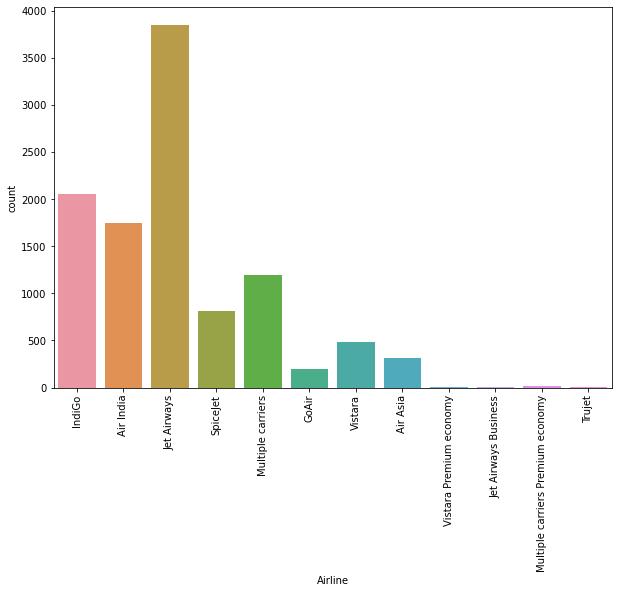

In [18]:
# Check distribution of Airline
plt.figure(figsize=(10,7))
sns.countplot(x=df.Airline)
plt.xticks(rotation=90)
plt.show()

#### Insights
- The most preferred airline is Jet Airways.
- Trujet, Jet Airways Business, Vistara Premium Economy and Multiple carriers Premium Economy are the least preferred ones.

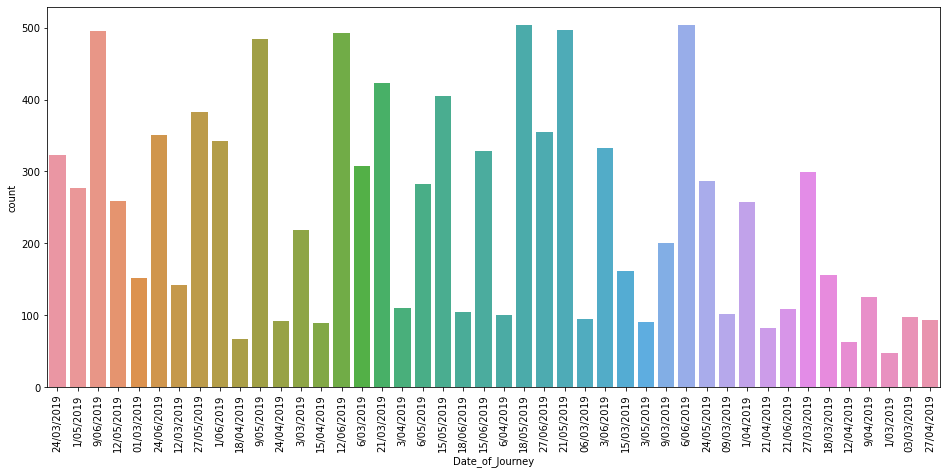

In [19]:
# Check distribution of Date_of_Journey
plt.figure(figsize=(16,7))
sns.countplot(x=df.Date_of_Journey)
plt.xticks(rotation=90)
plt.show()

#### Insights
- Majority of the people have travelled in the month of May and June.

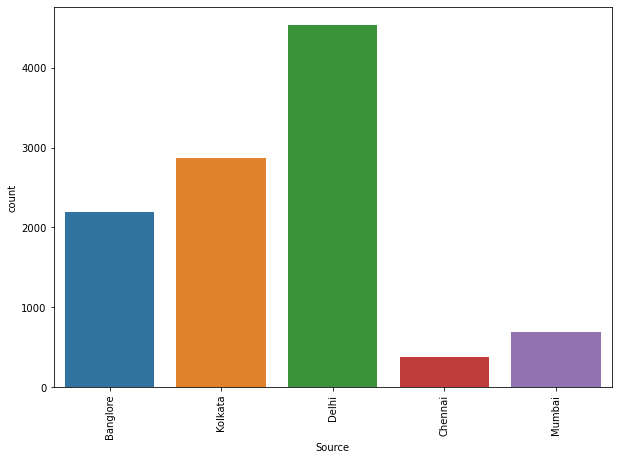

In [20]:
# Check distribution of Source
plt.figure(figsize=(10,7))
sns.countplot(x=df.Source)
plt.xticks(rotation=90)
plt.show()

#### Insights
- Delhi is the most popular source city for flights, while Chennai is the least popular.

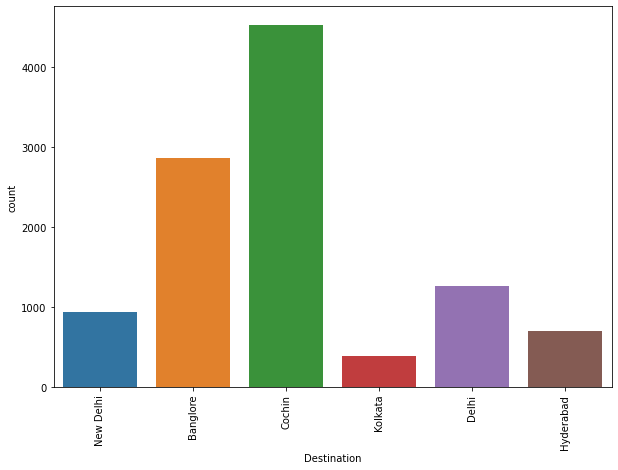

In [21]:
# Check distribution of Destination
plt.figure(figsize=(10,7))
sns.countplot(x=df.Destination)
plt.xticks(rotation=90)
plt.show()

#### Insights
- Cochin is the most popular destination.
- Kolkata is the least popular destination.

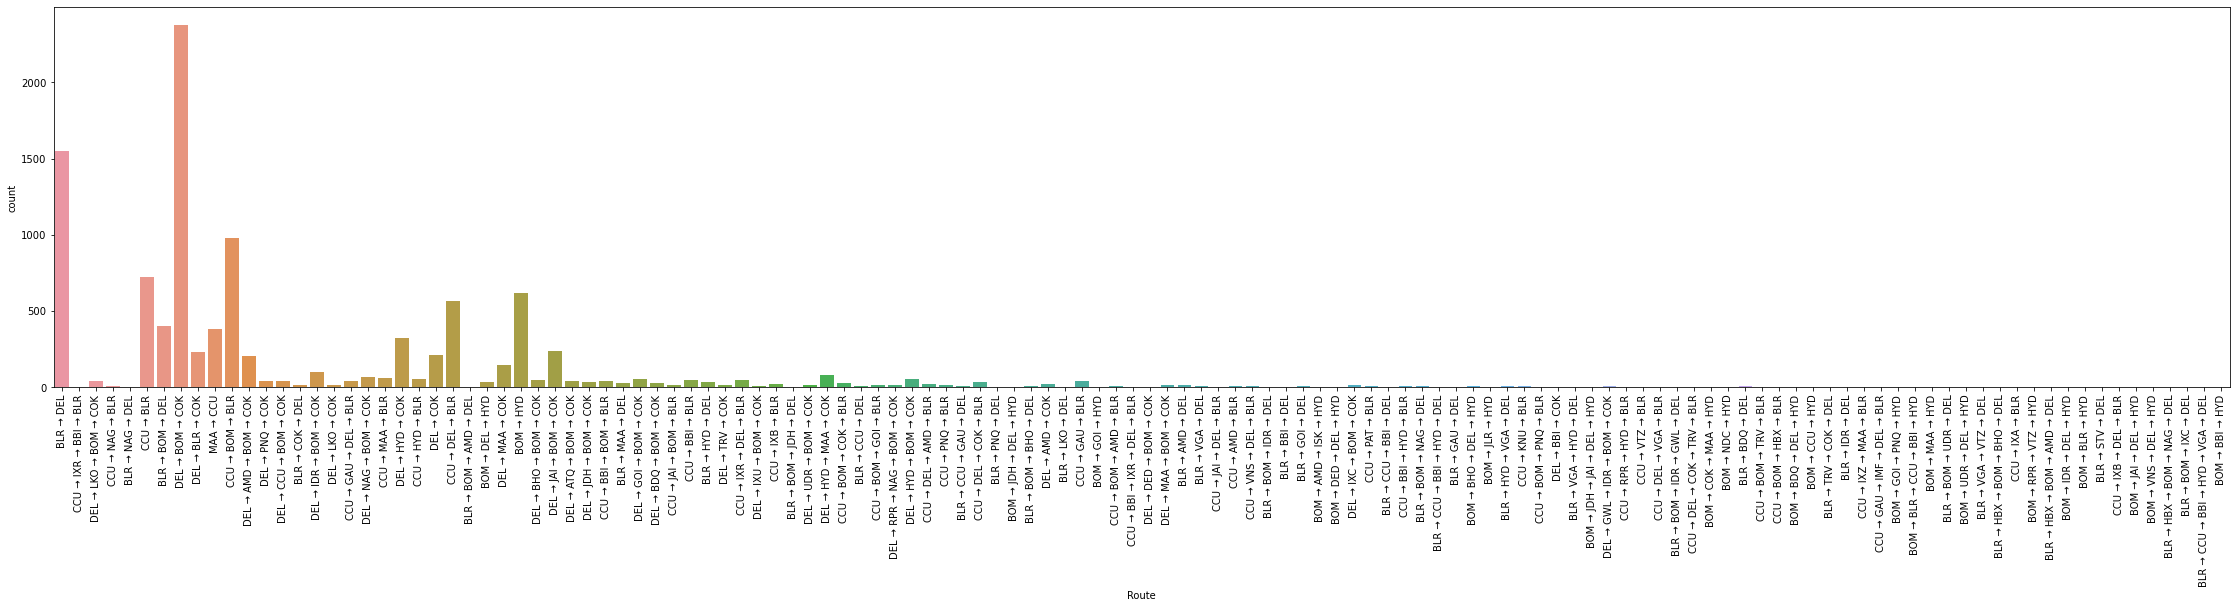

In [22]:
# Check distribution of Route
## Double tap on the plot to zoom in
plt.figure(figsize=(39,7))
sns.countplot(x=df.Route)
plt.xticks(rotation=90)
plt.show()

#### Insights
- The most preferred Route is DEL-BOM-COK

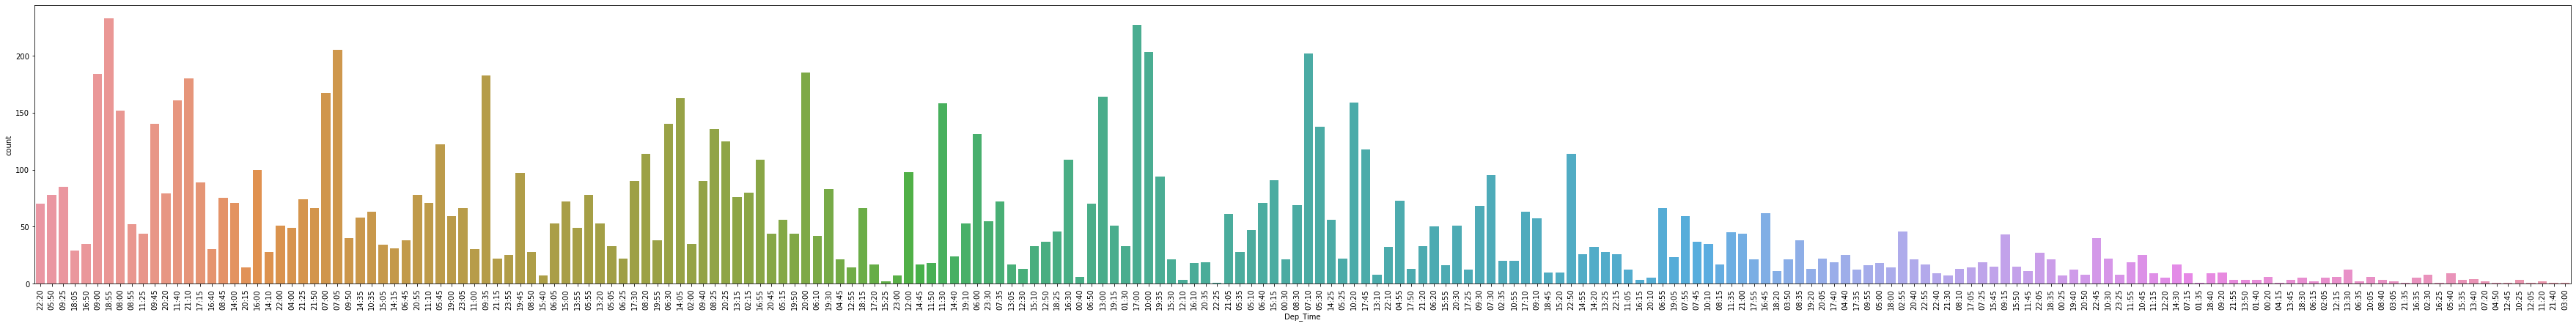

In [23]:
# Check distribution of Dep_Time
## Double tap on the plot to zoom in
plt.figure(figsize=(62,7))
sns.countplot(x=df.Dep_Time)
plt.xticks(rotation=90)
plt.show()

#### Insights
- The most preferred departure time is 18:55 and 17:00.

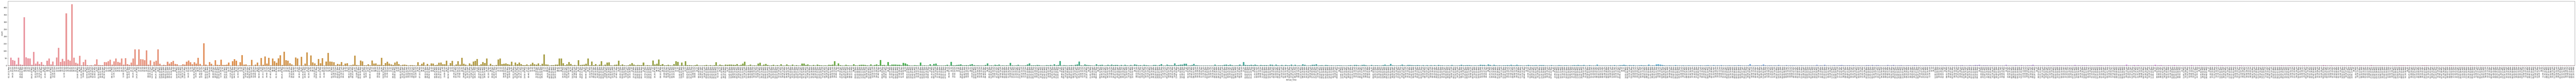

In [24]:
# Check distribution of Arrival_Time
## Double tap on the plot to zoom in
plt.figure(figsize=(272,7))
sns.countplot(x=df.Arrival_Time)
plt.xticks(rotation=90)
plt.show()

#### Insights
- The most frequent arrival time is 19:00 hrs.

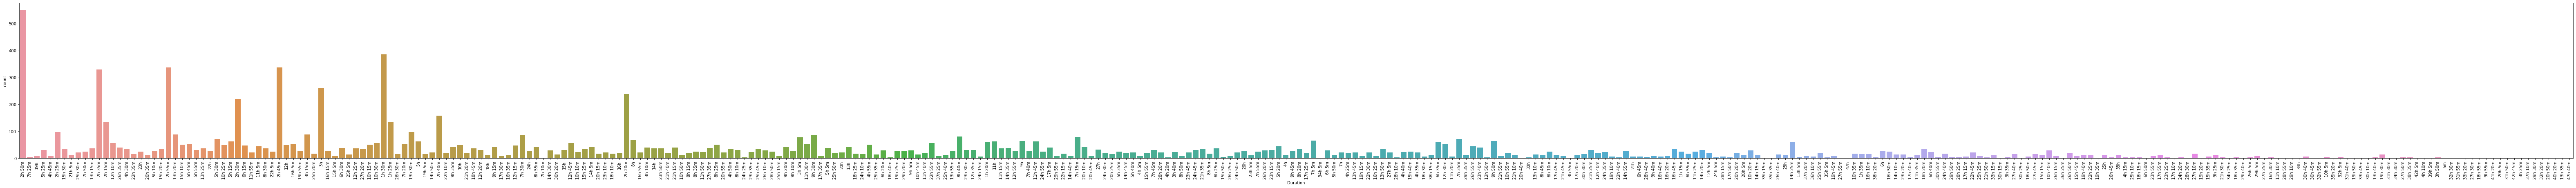

In [25]:
# Check distribution of Duration
## Double tap on the plot to zoom in
plt.figure(figsize=(112,7))
sns.countplot(x=df.Duration)
plt.xticks(rotation=90)
plt.show()

#### Insights
- The longest flight duration is 2hours and 50 minutes.

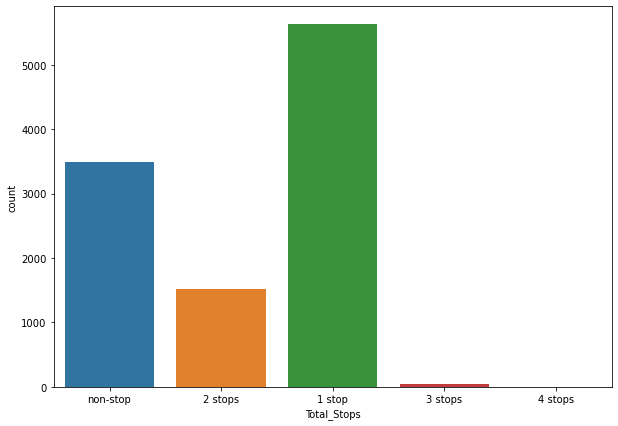

In [26]:
# Check distribution of Total_Stops
plt.figure(figsize=(10,7))
sns.countplot(x=df.Total_Stops)
plt.show()

#### Insights
- Majority of the flights have only one stop, while only a small number have 2 or more stops.

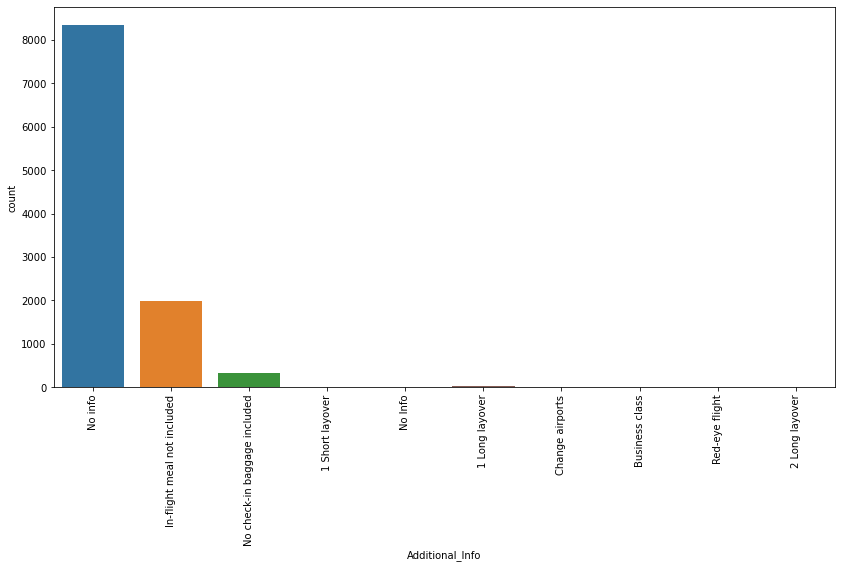

In [27]:
# Check distribution of Additional_Info
plt.figure(figsize=(14,7))
sns.countplot(x=df.Additional_Info)
plt.xticks(rotation=90)
plt.show()

#### Insights
- More than 8000 travellers have not provided any information.
- Around 2000 travellers have reported that In-flight meals were not included in their journey.

## For Numerical Column

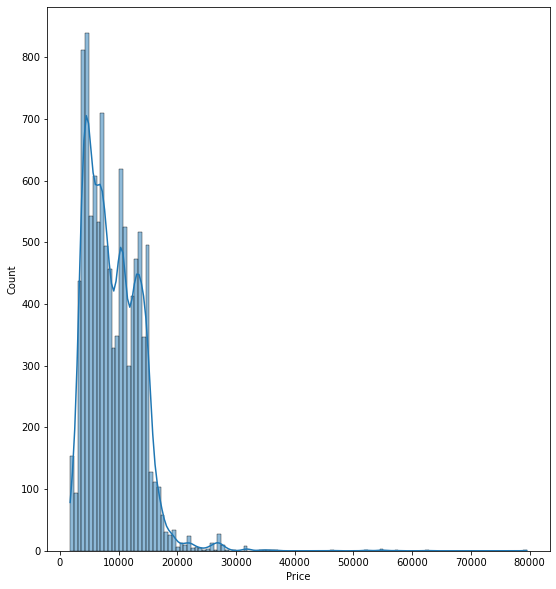

In [28]:
# Check the distribution of Price
plt.figure(figsize=(9,10))
sns.histplot(x='Price',data=df,kde=True)
plt.show()

### Insight for Price
  - Price is postively skewed.
  - Maximum flight travellers are between 3000 - 16000 price range

## B. Bivariate

### Checking the relation between the dependent and independent variables.

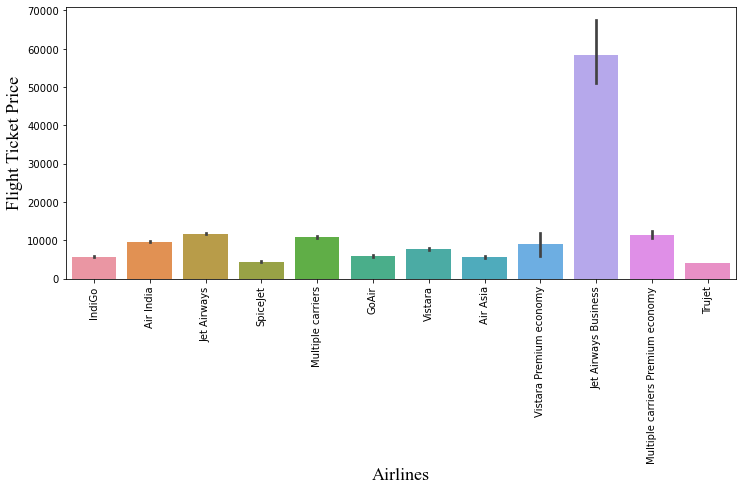

In [29]:
# Analyse Airline with Price
plt.figure(figsize=(12,5))
sns.barplot(data=df,x='Airline',y='Price')
font_style={'family':'times new roman','size':18,'color':'black'}
plt.ylabel("Flight Ticket Price", fontdict=font_style)
plt.xlabel("Airlines", fontdict=font_style)
plt.xticks(rotation=90)
plt.show()

#### Insights
- "Jet Airways Business" flight tickets are the most expensive ones.
- "Air Asia", "True Jet", "Spice Jet" and "Go Air" flight tickets are amongst the cheapest ones.

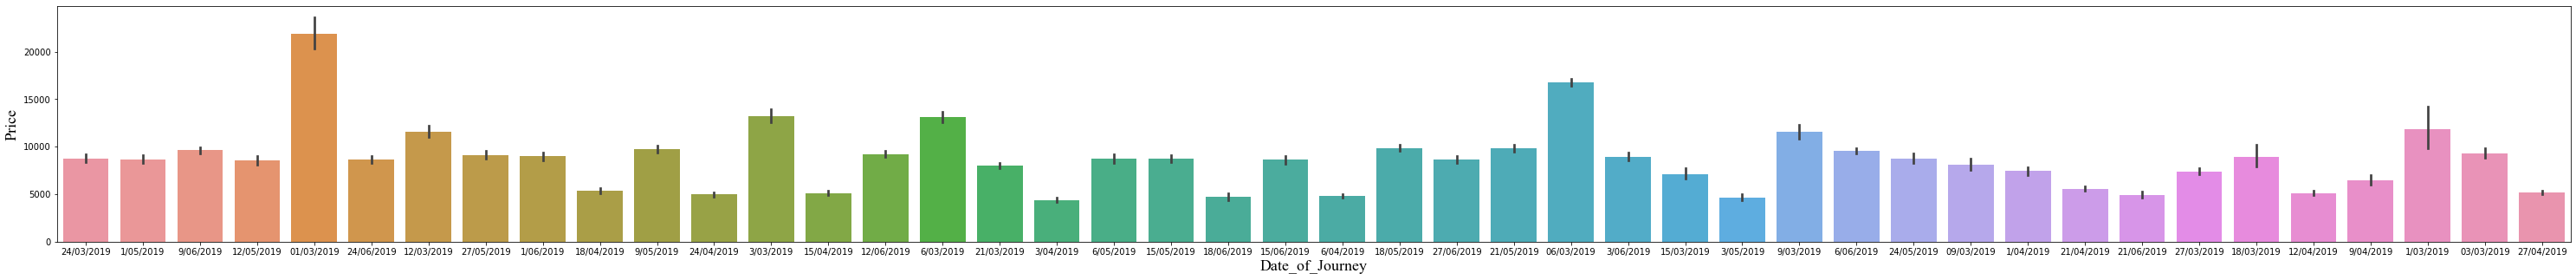

In [30]:
# Analyse Date_of_Journey with Price
plt.figure(figsize=(52,5))
sns.barplot(data=df,x='Date_of_Journey',y='Price')
font_style={'family':'times new roman','size':18,'color':'black'}
plt.ylabel("Price", fontdict=font_style)
plt.xlabel("Date_of_Journey", fontdict=font_style)
plt.show()

#### Insights
- Maximum travellers spent on flight tickets for journey on 01/03/2019

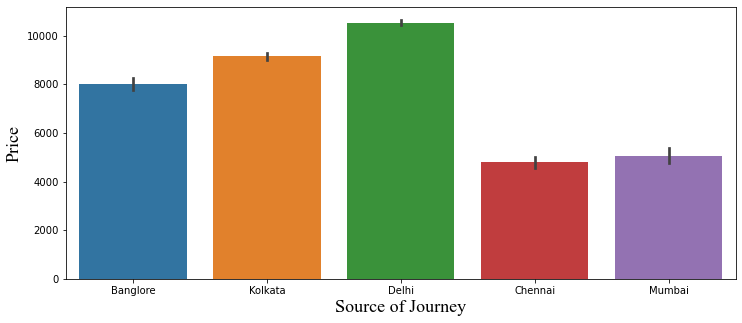

In [31]:
# Analyse Source with Price
plt.figure(figsize=(12,5))
sns.barplot(data=df,x='Source',y='Price')
font_style={'family':'times new roman','size':18,'color':'black'}
plt.ylabel("Price", fontdict=font_style)
plt.xlabel("Source of Journey", fontdict=font_style)
plt.show()

#### Insights
- The travellers are spending more if the source of journey is Delhi.
- The travellers are spending less if the source of journey is Chennai or Mumbai.

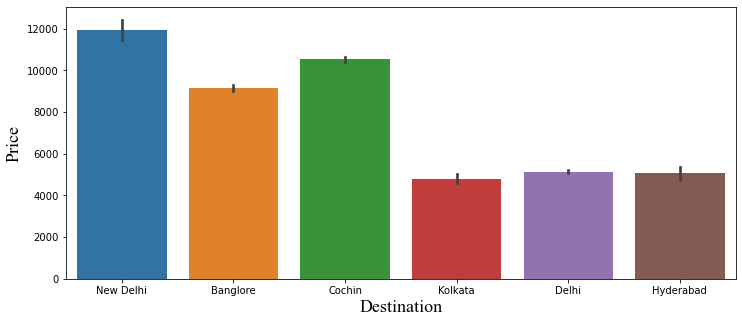

In [32]:
# Analyse Destination with Price
plt.figure(figsize=(12,5))
sns.barplot(data=df,x='Destination',y='Price')
font_style={'family':'times new roman','size':18,'color':'black'}
plt.ylabel("Price", fontdict=font_style)
plt.xlabel("Destination", fontdict=font_style)
plt.show()

#### Insights
- New Delhi is the most popular destination with maximum spends by flyers.
- Kolkata is the least popular destination with lowest spends by flyers.

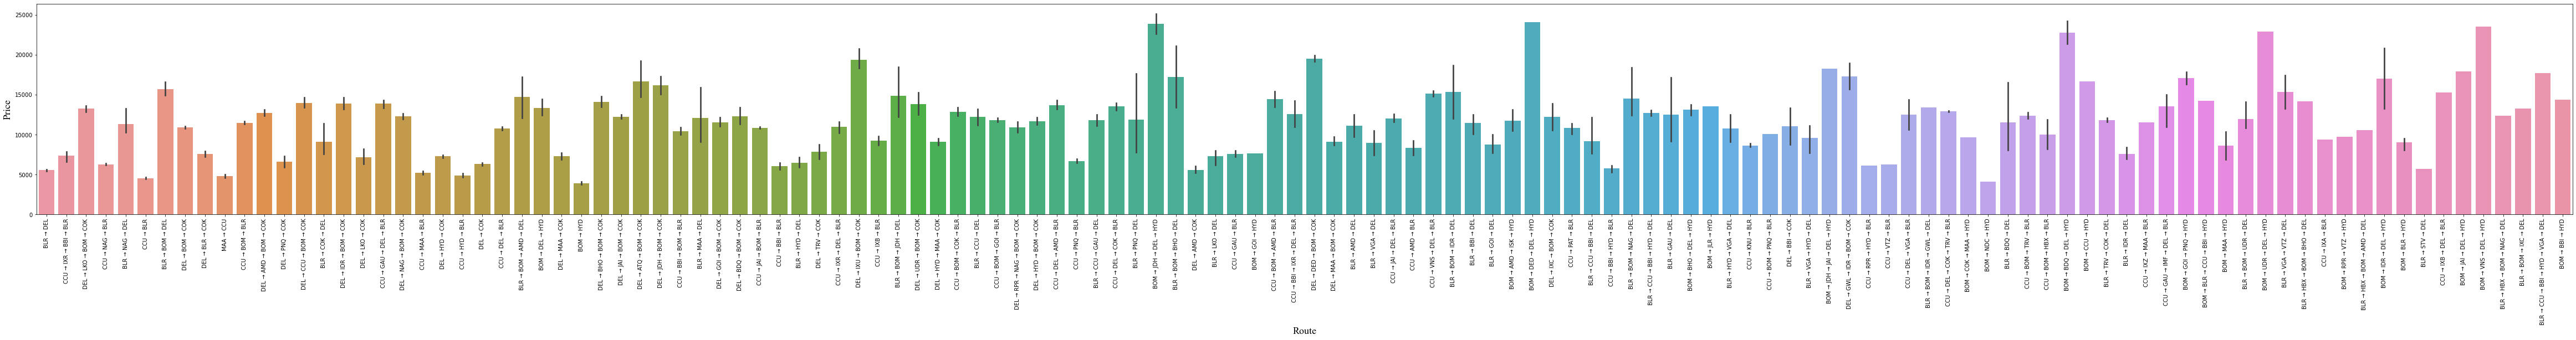

In [33]:
# Analyse Route with Price
plt.figure(figsize=(82,7))
sns.barplot(data=df,x='Route',y='Price')
font_style={'family':'times new roman','size':18,'color':'black'}
plt.ylabel("Price", fontdict=font_style)
plt.xlabel("Route", fontdict=font_style)
plt.xticks(rotation=90)
plt.show()

#### Insights
- The price for the following routes are higher than other routes:-
    - BOM → JDH → DEL → HYD
    - BOM → DED → DEL → HYD
    - BOM → BDQ → DEL → HYD
    - BOM → UDR → DEL → HYD
    - BOM → VNS → DEL → HYD

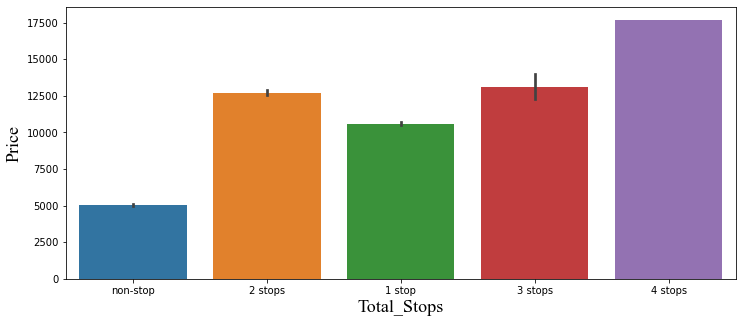

In [34]:
# Analyse Total_Stops with Price
plt.figure(figsize=(12,5))
sns.barplot(data=df,x='Total_Stops',y='Price')
font_style={'family':'times new roman','size':18,'color':'black'}
plt.ylabel("Price", fontdict=font_style)
plt.xlabel("Total_Stops", fontdict=font_style)
plt.show()

#### Insights
- The route with 4 stops is most expensive.
- The route with 0 stops is least expensive.

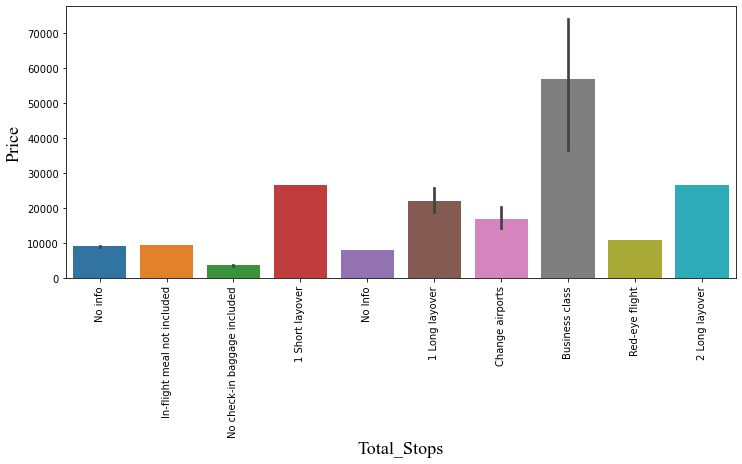

In [35]:
# Analyse Total_Stops with Price
plt.figure(figsize=(12,5))
sns.barplot(data=df,x='Additional_Info',y='Price')
font_style={'family':'times new roman','size':18,'color':'black'}
plt.ylabel("Price", fontdict=font_style)
plt.xlabel("Total_Stops", fontdict=font_style)
plt.xticks(rotation=90)
plt.show()

## Insight
- Travellers are paying more for Business Class tickets

# 7. Data Preprocessing

### A. Checking missing values & Handling them

In [36]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [37]:
# Imputing missing values in Route and Total_Stops columns with mode values since they are categorical columns
df.Route.fillna(df.Route.mode()[0],inplace=True)
df.Total_Stops.fillna(df.Total_Stops.mode()[0],inplace=True)

In [38]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

### B. Checking duplicate values and handling them

In [39]:
df.duplicated().sum()

220

In [40]:
df.drop_duplicates(inplace= True)

In [41]:
df.duplicated().sum()

0

### C. Checking Outliers and handling them

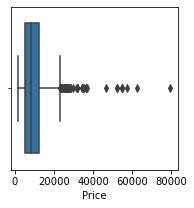

In [42]:
# Checking outliers for the price column because its the only numerical column
plt.figure(figsize=(3,3))
sns.boxplot(x='Price',data=df)
plt.show()

In [43]:
from scipy import stats

In [44]:
IQR = stats.iqr(df.Price, interpolation = 'midpoint') 

IQR

7119.5

In [45]:
Q1=df.Price.quantile(0.25)
Q3=df.Price.quantile(0.75)

min_limit=Q1 - 1.5*IQR 

max_limit=Q3 + 1.5*IQR 


In [46]:
min_limit

-5455.25

In [47]:
max_limit

23022.75

In [48]:
df.loc[df['Price']<min_limit] 

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price


In [49]:
df.loc[df['Price']>max_limit]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
123,Air India,1/03/2019,Delhi,Cochin,DEL → BOM → COK,23:00,19:15 02 Mar,20h 15m,1 stop,No info,27430
396,Multiple carriers,1/03/2019,Delhi,Cochin,DEL → BOM → COK,12:50,19:15,6h 25m,1 stop,No info,36983
486,Jet Airways,01/03/2019,Banglore,New Delhi,BLR → BOM → DEL,08:55,15:15,6h 20m,1 stop,No info,26890
510,Jet Airways,01/03/2019,Banglore,New Delhi,BLR → BOM → DEL,07:00,12:25,5h 25m,1 stop,No info,26890
597,Air India,6/03/2019,Mumbai,Hyderabad,BOM → JDH → DEL → HYD,09:40,15:15 07 Mar,29h 35m,2 stops,No info,25139
...,...,...,...,...,...,...,...,...,...,...,...
10353,Jet Airways,6/03/2019,Mumbai,Hyderabad,BOM → BDQ → DEL → HYD,19:50,16:50 07 Mar,21h,2 stops,No info,24210
10364,Jet Airways Business,01/03/2019,Banglore,New Delhi,BLR → MAA → DEL,09:45,14:25,4h 40m,1 stop,Business class,57209
10383,Jet Airways,01/03/2019,Banglore,New Delhi,BLR → BOM → DEL,07:00,05:05 02 Mar,22h 5m,1 stop,No info,26890
10439,Jet Airways,01/03/2019,Banglore,New Delhi,BLR → BOM → DEL,18:40,09:00 02 Mar,14h 20m,1 stop,No info,31825


In [50]:
df.loc[df['Price']>max_limit,'Price']=np.median(df.Price)

In [51]:
df.loc[df['Price']>max_limit] 

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price


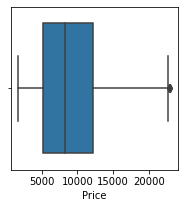

In [52]:
## Checking if the outliers have been replaced
plt.figure(figsize=(3,3))
sns.boxplot(x='Price',data=df)
plt.show()

# 8. Converting categorical data to numerical

### A. Airline

In [53]:
df['Airline'].unique() #checking unique value in Airline column

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

In [54]:
df.Airline=df.Airline.map({'IndiGo': 11, 'Air India': 10, 'Jet Airways' : 9, 'SpiceJet' : 8,
       'Multiple carriers': 7, 'GoAir' : 6, 'Vistara' : 5, 'Air Asia' : 4,
       'Vistara Premium economy' : 3, 'Jet Airways Business' : 2,
       'Multiple carriers Premium economy' : 1, 'Trujet' : 0})

In [55]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,11,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,10,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,9,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,11,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,11,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


### B. Source, Destination & Total stops

In [56]:
LE=LabelEncoder()
for i in ["Source","Destination","Total_Stops"]:
    df[i]=LE.fit_transform(df[i])
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,11,24/03/2019,0,5,BLR → DEL,22:20,01:10 22 Mar,2h 50m,4,No info,3897
1,10,1/05/2019,3,0,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,1,No info,7662
2,9,9/06/2019,2,1,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,1,No info,13882
3,11,12/05/2019,3,0,CCU → NAG → BLR,18:05,23:30,5h 25m,0,No info,6218
4,11,01/03/2019,0,5,BLR → NAG → DEL,16:50,21:35,4h 45m,0,No info,13302


### C. Additional info

In [57]:
df.Additional_Info.unique()

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover', 'No Info',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

In [58]:
df.Additional_Info=df.Additional_Info.map({'No info' : 0, 'In-flight meal not included' : 1,
       'No check-in baggage included' : 2, '1 Short layover' : 3, 'No Info' : 4,
       '1 Long layover' : 5, 'Change airports' : 6, 'Business class' : 7,
       'Red-eye flight' : 8, '2 Long layover' : 9})

In [59]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,11,24/03/2019,0,5,BLR → DEL,22:20,01:10 22 Mar,2h 50m,4,0,3897
1,10,1/05/2019,3,0,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,1,0,7662
2,9,9/06/2019,2,1,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,1,0,13882
3,11,12/05/2019,3,0,CCU → NAG → BLR,18:05,23:30,5h 25m,0,0,6218
4,11,01/03/2019,0,5,BLR → NAG → DEL,16:50,21:35,4h 45m,0,0,13302


### D. Extracting day, month, year from Date_of_Journey feature and store them in new columns. 

In [60]:
df["Journey_date"]=df["Date_of_Journey"].str.split("/").str[0].astype(int)
df["Journey_month"]=df["Date_of_Journey"].str.split("/").str[1].astype(int)
df["Journey_year"]=df["Date_of_Journey"].str.split("/").str[2].astype(int)

In [61]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_date,Journey_month,Journey_year
0,11,24/03/2019,0,5,BLR → DEL,22:20,01:10 22 Mar,2h 50m,4,0,3897,24,3,2019
1,10,1/05/2019,3,0,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,1,0,7662,1,5,2019
2,9,9/06/2019,2,1,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,1,0,13882,9,6,2019
3,11,12/05/2019,3,0,CCU → NAG → BLR,18:05,23:30,5h 25m,0,0,6218,12,5,2019
4,11,01/03/2019,0,5,BLR → NAG → DEL,16:50,21:35,4h 45m,0,0,13302,1,3,2019


### E. Extracting hours and min from Arrival time, Departure time

In [62]:
# Arrival_Time
df["Arrival_Time"]=df["Arrival_Time"].str.split(" ").str[0]
df['Arrival_hour']=df["Arrival_Time"].str.split(':').str[0].astype(int)
df['Arrival_min']=df["Arrival_Time"].str.split(':').str[1].astype(int)

#Dep_Time
df['Dep_hour']=df["Dep_Time"].str.split(':').str[0].astype(int)
df['Dep_min']=df["Dep_Time"].str.split(':').str[1].astype(int)

df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_date,Journey_month,Journey_year,Arrival_hour,Arrival_min,Dep_hour,Dep_min
0,11,24/03/2019,0,5,BLR → DEL,22:20,01:10,2h 50m,4,0,3897,24,3,2019,1,10,22,20
1,10,1/05/2019,3,0,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,1,0,7662,1,5,2019,13,15,5,50
2,9,9/06/2019,2,1,DEL → LKO → BOM → COK,09:25,04:25,19h,1,0,13882,9,6,2019,4,25,9,25
3,11,12/05/2019,3,0,CCU → NAG → BLR,18:05,23:30,5h 25m,0,0,6218,12,5,2019,23,30,18,5
4,11,01/03/2019,0,5,BLR → NAG → DEL,16:50,21:35,4h 45m,0,0,13302,1,3,2019,21,35,16,50


# 9. Feature Engineering

## A. Removing Irrelevant columns

In [63]:
df.drop('Date_of_Journey',axis= True, inplace= True)
df.drop('Route',axis= True, inplace= True) #'Total_Stops' field has already captured this value and both are related.
df.drop('Dep_Time',axis= True, inplace= True)
df.drop('Arrival_Time',axis= True, inplace= True)
df.drop('Duration',axis= True, inplace= True) # Duration can be understand after looking at dep_time & Arrival_time

In [64]:
df["Journey_year"].value_counts()

2019    10463
Name: Journey_year, dtype: int64

In [65]:
df.drop('Journey_year',axis= True, inplace= True) # Since Journey year is 2019 for all rows

In [66]:
df.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Journey_date,Journey_month,Arrival_hour,Arrival_min,Dep_hour,Dep_min
0,11,0,5,4,0,3897,24,3,1,10,22,20
1,10,3,0,1,0,7662,1,5,13,15,5,50
2,9,2,1,1,0,13882,9,6,4,25,9,25
3,11,3,0,0,0,6218,12,5,23,30,18,5
4,11,0,5,0,0,13302,1,3,21,35,16,50


## B. Correlation

In [67]:
df.corr()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Journey_date,Journey_month,Arrival_hour,Arrival_min,Dep_hour,Dep_min
Airline,1.000000,0.027974,0.068786,0.085902,-0.042304,-0.054820,-0.020296,-0.028930,-0.045314,-0.005394,0.016121,-0.046173
Source,0.027974,1.000000,-0.589991,-0.222855,-0.012660,0.074516,0.005437,0.181073,0.028254,0.021392,0.060215,-0.056602
Destination,0.068786,-0.589991,1.000000,0.334108,0.057751,-0.165812,-0.040967,-0.362191,-0.044586,0.016351,-0.074037,0.128484
Total_Stops,0.085902,-0.222855,0.334108,1.000000,-0.012293,-0.620902,0.030337,-0.021428,-0.099297,0.176737,0.040354,0.049250
Additional_Info,-0.042304,-0.012660,0.057751,-0.012293,1.000000,-0.067687,-0.001078,0.013381,-0.056950,-0.031217,0.031367,0.054559
Price,-0.054820,0.074516,-0.165812,-0.620902,-0.067687,1.000000,-0.121213,-0.058663,0.046019,-0.097136,0.004986,-0.053553
Journey_date,-0.020296,0.005437,-0.040967,0.030337,-0.001078,-0.121213,1.000000,-0.038351,-0.002394,-0.015087,-0.003343,-0.004833
Journey_month,-0.028930,0.181073,-0.362191,-0.021428,0.013381,-0.058663,-0.038351,1.000000,0.001407,-0.099260,0.040390,-0.062605
Arrival_hour,-0.045314,0.028254,-0.044586,-0.099297,-0.056950,0.046019,-0.002394,0.001407,1.000000,-0.152034,-0.003789,0.046494
Arrival_min,-0.005394,0.021392,0.016351,0.176737,-0.031217,-0.097136,-0.015087,-0.099260,-0.152034,1.000000,0.072987,-0.021350


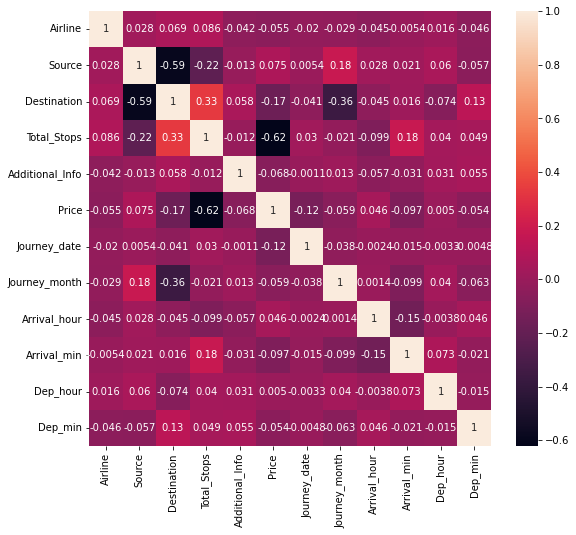

In [68]:
plt.figure(figsize=(9,8))
sns.heatmap(df.corr(), annot= True)
plt.show()

### Insights
- There is no high correlation between any features

# 10. Splitting Data

In [69]:
x= df.drop('Price', axis=1)
y= df['Price']
x.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Journey_date,Journey_month,Arrival_hour,Arrival_min,Dep_hour,Dep_min
0,11,0,5,4,0,24,3,1,10,22,20
1,10,3,0,1,0,1,5,13,15,5,50
2,9,2,1,1,0,9,6,4,25,9,25
3,11,3,0,0,0,12,5,23,30,18,5
4,11,0,5,0,0,1,3,21,35,16,50


In [70]:
x_train, x_test, y_train, y_test= train_test_split(x,y, test_size= 0.30, random_state= 40)
x_test.shape

(3139, 11)

# 11. Building Machine Learning models

## A. Linear Regression

In [71]:
LR = LinearRegression()

#### MODEL TRAINING

In [72]:
LR.fit(x_train,y_train)

LinearRegression()

In [73]:
training_data_prediction = LR.predict(x_train)

In [74]:
error_score = metrics.r2_score(y_train, training_data_prediction) 
print('R squared error :' ,error_score)

R squared error : 0.41114450690202753


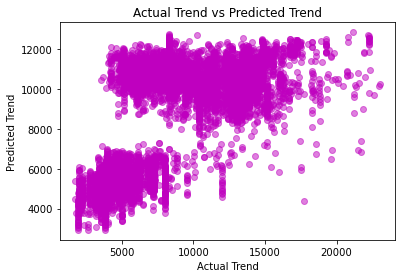

In [75]:
# visualize the actual trend and predicted trend
plt.scatter(y_train, training_data_prediction, alpha = 0.5, color ="m")
plt.xlabel('Actual Trend')
plt.ylabel('Predicted Trend')
plt.title('Actual Trend vs Predicted Trend')
plt.show()

#### MODEL TESTING

In [76]:
test_data_prediction = LR.predict(x_test)

In [77]:
error_score = metrics.r2_score(y_test, test_data_prediction) 
print('R squared error :' ,error_score)

R squared error : 0.41562608133054224


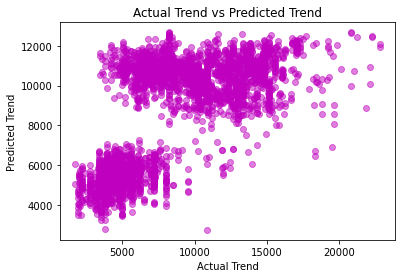

In [78]:
plt.scatter(y_test, test_data_prediction, alpha = 0.5, color ="m")
plt.xlabel('Actual Trend')
plt.ylabel('Predicted Trend')
plt.title('Actual Trend vs Predicted Trend')
plt.show()

### MODEL EVALUATION

In [79]:
y_pred = LR.predict(x_test)

In [80]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred,squared=False)

In [81]:
print (f"Mean Square Error : {mse}")
print (f"mean_absolute_error : {mae}")
print(f"R2 Score : {r2}")
print(f"rmse Score : {rmse}")

Mean Square Error : 9388667.764574695
mean_absolute_error : 2426.128422153129
R2 Score : 0.41562608133054224
rmse Score : 3064.093302198008


### Insights for Linear Regression Model

* The training data and the testing data have the same accuracy score of 0.41.
* Linear Regression is performing well on both the training and testing dataset.
* R2 Score 0.41 suggests a moderately effective model.

## B. DecisionTreeRegressor

In [82]:
DT = DecisionTreeRegressor()

#### MODEL TRAINING

In [83]:
DT.fit(x_train,y_train)

DecisionTreeRegressor()

In [84]:
training_data_prediction = DT.predict(x_train)

In [85]:
error_score = metrics.r2_score(y_train, training_data_prediction) 
print('R squared error :' ,error_score)

R squared error : 0.9947230172702769


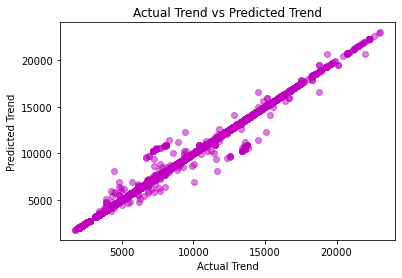

In [86]:
# visualize the actual trend and predicted trend
plt.scatter(y_train, training_data_prediction, alpha = 0.5, color ="m")
plt.xlabel('Actual Trend')
plt.ylabel('Predicted Trend')
plt.title('Actual Trend vs Predicted Trend')
plt.show()

#### MODEL TESTING

In [87]:
test_data_prediction = DT.predict(x_test)

In [88]:
error_score = metrics.r2_score(y_test, test_data_prediction) 
print('R squared error :' ,error_score)

R squared error : 0.8204475849555494


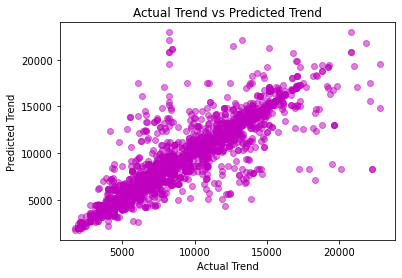

In [89]:
plt.scatter(y_test, test_data_prediction, alpha = 0.5, color ="m")
plt.xlabel('Actual Trend')
plt.ylabel('Predicted Trend')
plt.title('Actual Trend vs Predicted Trend')
plt.show()

### MODEL EVALUATION

In [90]:
y_pred = DT.predict(x_test)

In [91]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred,squared=False)

In [92]:
print (f"Mean Square Error : {mse}")
print (f"mean_absolute_error : {mae}")
print(f"R2 Score : {r2}")
print(f"rmse Score : {rmse}")

Mean Square Error : 2884724.860783689
mean_absolute_error : 755.784326218541
R2 Score : 0.8204475849555494
rmse Score : 1698.4477798224145


### Insights for DecisionTreeRegressor Model

* The difference between the two R² scores is too large, which suggests that the model is severely overfitting.
* Decision Tree Regressor performed relatively better with an accuracy of 0.82.

## C. GradientBoostingRegressor

In [93]:
GBR = GradientBoostingRegressor()

#### MODEL TRAINING

In [94]:
GBR.fit(x_train,y_train)

GradientBoostingRegressor()

In [95]:
training_data_prediction = GBR.predict(x_train)

In [96]:
error_score = metrics.r2_score(y_train, training_data_prediction) 
print('R squared error :' ,error_score)

R squared error : 0.8129986772873077


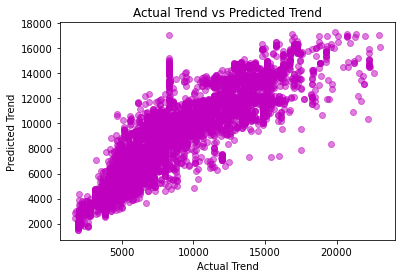

In [97]:
# visualize the actual trend and predicted trend
plt.scatter(y_train, training_data_prediction, alpha = 0.5, color ="m")
plt.xlabel('Actual Trend')
plt.ylabel('Predicted Trend')
plt.title('Actual Trend vs Predicted Trend')
plt.show()

#### MODEL TESTING

In [98]:
test_data_prediction = GBR.predict(x_test)

In [99]:
error_score = metrics.r2_score(y_test, test_data_prediction) 
print('R squared error :' ,error_score)

R squared error : 0.7956663945117624


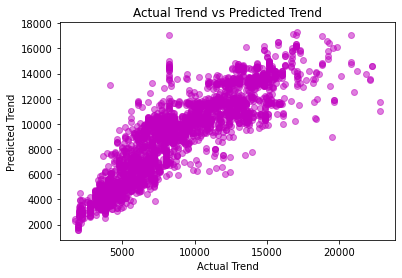

In [100]:
plt.scatter(y_test, test_data_prediction, alpha = 0.5, color ="m")
plt.xlabel('Actual Trend')
plt.ylabel('Predicted Trend')
plt.title('Actual Trend vs Predicted Trend')
plt.show()

### MODEL EVALUATION

In [101]:
y_pred = GBR.predict(x_test)

In [102]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred,squared=False)

In [103]:
print (f"Mean Square Error : {mse}")
print (f"mean_absolute_error : {mae}")
print(f"R2 Score : {r2}")
print(f"rmse Score : {rmse}")

Mean Square Error : 3282864.4020163156
mean_absolute_error : 1280.792728939452
R2 Score : 0.7956663945117624
rmse Score : 1811.8676557674723


### Insight for GradientBoostingRegressor Model

* The training data score of 0.81 and test data score of 0.79 suggest that the model performs slightly better on the training data compared to the test data.

## D. Support Vector Regressor

In [104]:
SVR = SVR()

#### MODEL TRAINING

In [105]:
SVR.fit(x_train,y_train)

SVR()

In [106]:
training_data_prediction = SVR.predict(x_train)

In [107]:
error_score = metrics.r2_score(y_train, training_data_prediction) 
print('R squared error :' ,error_score)

R squared error : -0.01593484914835641


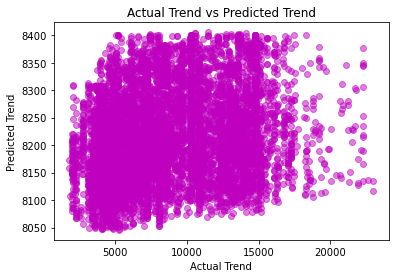

In [108]:
# visualize the actual trend and predicted trend
plt.scatter(y_train, training_data_prediction, alpha = 0.5, color ="m")
plt.xlabel('Actual Trend')
plt.ylabel('Predicted Trend')
plt.title('Actual Trend vs Predicted Trend')
plt.show()

#### MODEL TESTING

In [109]:
test_data_prediction = SVR.predict(x_test)

In [110]:
error_score = metrics.r2_score(y_test, test_data_prediction) 
print('R squared error :' ,error_score)

R squared error : -0.008903979247008476


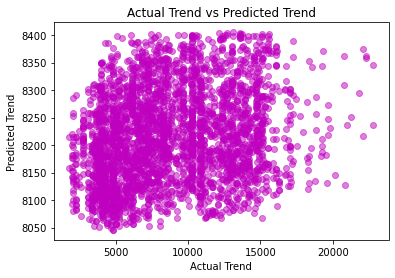

In [111]:
plt.scatter(y_test, test_data_prediction, alpha = 0.5, color ="m")
plt.xlabel('Actual Trend')
plt.ylabel('Predicted Trend')
plt.title('Actual Trend vs Predicted Trend')
plt.show()

### MODEL EVALUATION

In [112]:
y_pred = SVR.predict(x_test)

In [113]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred,squared=False)

In [114]:
print (f"Mean Square Error : {mse}")
print (f"mean_absolute_error : {mae}")
print(f"R2 Score : {r2}")
print(f"rmse Score : {rmse}")

Mean Square Error : 16209252.269633492
mean_absolute_error : 3365.342309370434
R2 Score : -0.008903979247008476
rmse Score : 4026.0715678727684


### Insights for Support Vector Regressor Model

* Support Vector Regressor had a negative accuracy of -0.015634, indicating poor performance on the given regression problem.

## E. KNN Regressor

In [115]:
KNN = KNeighborsRegressor()

#### MODEL TRAINING

In [116]:
KNN.fit(x_train,y_train)

KNeighborsRegressor()

In [117]:
training_data_prediction = KNN.predict(x_train)

In [118]:
error_score = metrics.r2_score(y_train, training_data_prediction) 
print('R squared error :' ,error_score)

R squared error : 0.7596193978620059


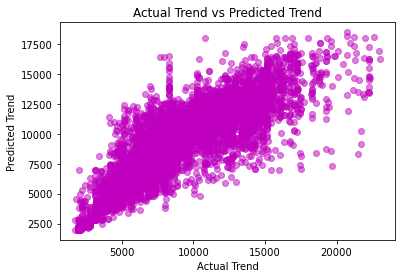

In [120]:
# visualize the actual trend and predicted trend
plt.scatter(y_train, training_data_prediction, alpha = 0.5, color ="m")
plt.xlabel('Actual Trend')
plt.ylabel('Predicted Trend')
plt.title('Actual Trend vs Predicted Trend')
plt.show()

#### MODEL TESTING

In [121]:
test_data_prediction = KNN.predict(x_test)

In [122]:
error_score = metrics.r2_score(y_test, test_data_prediction) 
print('R squared error :' ,error_score)

R squared error : 0.5891947003474811


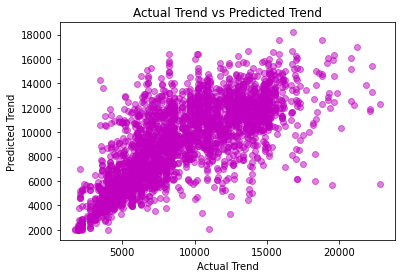

In [123]:
plt.scatter(y_test, test_data_prediction, alpha = 0.5, color ="m")
plt.xlabel('Actual Trend')
plt.ylabel('Predicted Trend')
plt.title('Actual Trend vs Predicted Trend')
plt.show()

### MODEL EVALUATION

In [124]:
y_pred = KNN.predict(x_test)

In [125]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred,squared=False)

In [126]:
print (f"Mean Square Error : {mse}")
print (f"mean_absolute_error : {mae}")
print(f"R2 Score : {r2}")
print(f"rmse Score : {rmse}")

Mean Square Error : 6600079.762535839
mean_absolute_error : 1822.915514495062
R2 Score : 0.5891947003474811
rmse Score : 2569.0620394486077


### Insights for KNN Regressor Model

* The R² value for the training data (0.75) is still higher than the R² value for the test data (0.58). 
* This suggests that the model might be overfitting the training data to some extent.

## F. Random Forest Regression

In [127]:
RFR = RandomForestRegressor()

#### MODEL TRAINING

In [128]:
RFR.fit(x_train,y_train)

RandomForestRegressor()

In [129]:
training_data_prediction = RFR.predict(x_train)

In [130]:
error_score = metrics.r2_score(y_train, training_data_prediction) 
print('R squared error :' ,error_score)

R squared error : 0.9819077842964975


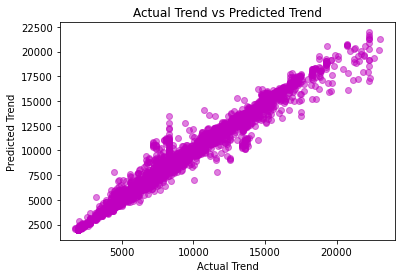

In [131]:
# visualize the actual trend and predicted trend
plt.scatter(y_train, training_data_prediction, alpha = 0.5, color ="m")
plt.xlabel('Actual Trend')
plt.ylabel('Predicted Trend')
plt.title('Actual Trend vs Predicted Trend')
plt.show()

#### MODEL TESTING

In [132]:
test_data_prediction = RFR.predict(x_test)

In [133]:
error_score = metrics.r2_score(y_test, test_data_prediction) 
print('R squared error :' ,error_score)

R squared error : 0.8955098244863212


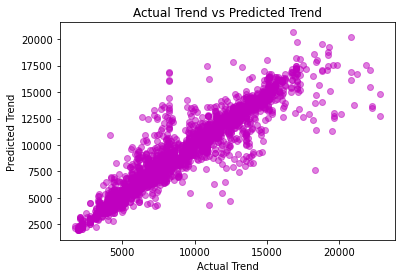

In [134]:
plt.scatter(y_test, test_data_prediction, alpha = 0.5, color ="m")
plt.xlabel('Actual Trend')
plt.ylabel('Predicted Trend')
plt.title('Actual Trend vs Predicted Trend')
plt.show()

### MODEL EVALUATION

In [135]:
y_pred = RFR.predict(x_test)

In [136]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred,squared=False)

In [137]:
print (f"Mean Square Error : {mse}")
print (f"mean_absolute_error : {mae}")
print(f"R2 Score : {r2}")
print(f"rmse Score : {rmse}")

Mean Square Error : 1678759.970660034
mean_absolute_error : 689.1430464029087
R2 Score : 0.8955098244863212
rmse Score : 1295.6696996765936


### Insights for Random Forest Regression Model

* The difference between the two R² scores isn't too large, which suggests that the model is not severely overfitting, but there is still some degree of overfitting or bias towards the training data.
* Random Forest Regressor performed relatively better with an accuracy of 0.89.

## G. XGBoost

In [138]:
XGBoost = xgb.XGBRegressor()

#### MODEL TRAINING

In [139]:
XGBoost.fit(x_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [140]:
training_data_prediction = XGBoost.predict(x_train)

In [141]:
error_score = metrics.r2_score(y_train, training_data_prediction) 
print('R squared error :' ,error_score)

R squared error : 0.9661985370527639


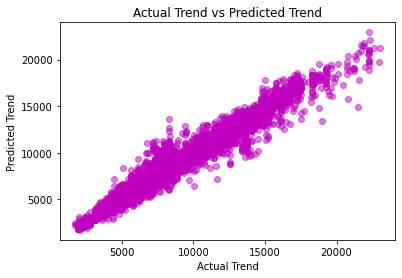

In [142]:
# visualize the actual trend and predicted trend
plt.scatter(y_train, training_data_prediction, alpha = 0.5, color ="m")
plt.xlabel('Actual Trend')
plt.ylabel('Predicted Trend')
plt.title('Actual Trend vs Predicted Trend')
plt.show()

#### MODEL TESTING

In [143]:
test_data_prediction = XGBoost.predict(x_test)

In [144]:
error_score = metrics.r2_score(y_test, test_data_prediction) 
print('R squared error :' ,error_score)

R squared error : 0.9021582513091008


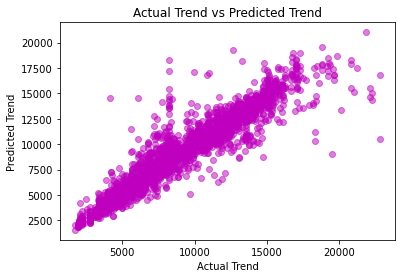

In [145]:
plt.scatter(y_test, test_data_prediction, alpha = 0.5, color ="m")
plt.xlabel('Actual Trend')
plt.ylabel('Predicted Trend')
plt.title('Actual Trend vs Predicted Trend')
plt.show()

### MODEL EVALUATION

In [146]:
y_pred = XGBoost.predict(x_test)

In [147]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred,squared=False)

In [148]:
print (f"Mean Square Error : {mse}")
print (f"mean_absolute_error : {mae}")
print(f"R2 Score : {r2}")
print(f"rmse Score : {rmse}")

Mean Square Error : 1571945.0211867827
mean_absolute_error : 742.551750190397
R2 Score : 0.9021582513091008
rmse Score : 1253.7723163265262


In [157]:
from sklearn.inspection import permutation_importance
from matplotlib import pyplot

In [154]:
# perform permutation importance
results = permutation_importance(XGBoost, x_train, y_train, scoring='r2')

In [155]:
# get importance
importance = results.importances_mean
importance=np.sort(importance)

Feature: 0  Score: 0.036565755532416436
Feature: 1  Score: 0.03732749565537059
Feature: 2  Score: 0.05644284938072099
Feature: 3  Score: 0.07012230903222993
Feature: 4  Score: 0.08230979974417392
Feature: 5  Score: 0.08382346930918996
Feature: 6  Score: 0.15727400941656822
Feature: 7  Score: 0.19545284293446646
Feature: 8  Score: 0.205415963528859
Feature: 9  Score: 0.5855234081124682
Feature: 10  Score: 0.6078194658147331


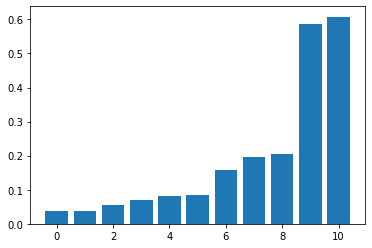

In [158]:
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: {}  Score: {}' .format(i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))] ,importance)
pyplot.show()

In [162]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10463 entries, 0 to 10682
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Airline          10463 non-null  int64
 1   Source           10463 non-null  int32
 2   Destination      10463 non-null  int32
 3   Total_Stops      10463 non-null  int32
 4   Additional_Info  10463 non-null  int64
 5   Price            10463 non-null  int64
 6   Journey_date     10463 non-null  int32
 7   Journey_month    10463 non-null  int32
 8   Arrival_hour     10463 non-null  int32
 9   Arrival_min      10463 non-null  int32
 10  Dep_hour         10463 non-null  int32
 11  Dep_min          10463 non-null  int32
dtypes: int32(9), int64(3)
memory usage: 694.8 KB


### Insights for XGBoost Model

* A high training R2 score 0f 0.96 and a reasonable high testing R2 score of 0.90 suggesting that the model is performing well.
* We are retaining the Additional_Info feature since its also important based on the feature importance table.

# 12. Hyper-Parameter Tuning
- Since XGBoost is the best model so we have decided to proceed with XGBoost model for hyper parameter tuning

In [163]:
params = {
 "learning_rate" : [0.05,0.10,0.15,0.20,0.25,0.30],
 "max_depth" : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma": [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
}

In [164]:
xgb_model_tuned = RandomizedSearchCV(estimator = xgb.XGBRegressor(), param_distributions = params, scoring='r2', n_iter = 20, cv = 5, verbose=2, random_state=45, n_jobs = 1)

In [165]:
xgb_model_tuned.fit(x_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] END colsample_bytree=0.7, gamma=0.0, learning_rate=0.25, max_depth=5, min_child_weight=7; total time=   0.1s
[CV] END colsample_bytree=0.7, gamma=0.0, learning_rate=0.25, max_depth=5, min_child_weight=7; total time=   0.1s
[CV] END colsample_bytree=0.7, gamma=0.0, learning_rate=0.25, max_depth=5, min_child_weight=7; total time=   0.1s
[CV] END colsample_bytree=0.7, gamma=0.0, learning_rate=0.25, max_depth=5, min_child_weight=7; total time=   0.1s
[CV] END colsample_bytree=0.7, gamma=0.0, learning_rate=0.25, max_depth=5, min_child_weight=7; total time=   0.1s
[CV] END colsample_bytree=0.5, gamma=0.2, learning_rate=0.25, max_depth=15, min_child_weight=5; total time=   0.4s
[CV] END colsample_bytree=0.5, gamma=0.2, learning_rate=0.25, max_depth=15, min_child_weight=5; total time=   0.4s
[CV] END colsample_bytree=0.5, gamma=0.2, learning_rate=0.25, max_depth=15, min_child_weight=5; total time=   0.4s
[CV] END colsample_bytr

[CV] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.3, max_depth=10, min_child_weight=3; total time=   0.3s
[CV] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.3, max_depth=10, min_child_weight=3; total time=   0.3s
[CV] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.3, max_depth=10, min_child_weight=3; total time=   0.3s
[CV] END colsample_bytree=0.3, gamma=0.2, learning_rate=0.3, max_depth=12, min_child_weight=3; total time=   0.3s
[CV] END colsample_bytree=0.3, gamma=0.2, learning_rate=0.3, max_depth=12, min_child_weight=3; total time=   0.3s
[CV] END colsample_bytree=0.3, gamma=0.2, learning_rate=0.3, max_depth=12, min_child_weight=3; total time=   0.3s
[CV] END colsample_bytree=0.3, gamma=0.2, learning_rate=0.3, max_depth=12, min_child_weight=3; total time=   0.3s
[CV] END colsample_bytree=0.3, gamma=0.2, learning_rate=0.3, max_depth=12, min_child_weight=3; total time=   0.3s
[CV] END colsample_bytree=0.7, gamma=0.3, learning_rate=0.15, max_depth=5, min_child_wei

RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, gamma=None,
                                          gpu_id=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=None, max_bin=None,
                                          m...
                                          n_estimators=100, n_jobs=None,
                                          num_parallel_tree=None,
                                          predictor=None, random_state=None,
                                          reg_alpha=None, reg_lambda=None, ...),
                   n_iter=20, n_jobs=1,
                   param_distributions={'colsample_bytree': [0.3, 0.4, 0.5,
                                                             0.7],
                                        'gamma': [0.0, 0.1, 0.2, 0.3, 0.4],
                                        'learning_rate': [0.05, 0.1, 0.15, 0.2,
                                                          0.25, 0.3],
                                        'max_depth': [3, 4, 5, 6, 8, 10, 12,
                                                      15],
                                        'min_child_weight': [1, 3, 5, 7]},
                   random_state=45, scoring='r2', verbose=2)

In [166]:
xgb_model_tuned.best_params_

{'min_child_weight': 1,
 'max_depth': 12,
 'learning_rate': 0.1,
 'gamma': 0.4,
 'colsample_bytree': 0.7}

In [167]:
prediction = xgb_model_tuned.predict(x_test)

In [168]:
print('Mean_Square_Error:', mean_squared_error(y_test, prediction))
print('Mean_Absolute_Error:', mean_absolute_error(y_test, prediction))
print('RMSE:', np.sqrt(mean_squared_error(y_test, prediction)))
print("R2 Score:", r2_score(y_test, prediction))

Mean_Square_Error: 1434068.2318147274
Mean_Absolute_Error: 682.367356780685
RMSE: 1197.525879392478
R2 Score: 0.9107400439253998


# 13. Conclusion

In this project, we applied various machine learning techniques to solve the problem of flight price prediction. We used a dataset of historical flight data to train the models that could predict the price of flights. The model XGBoost is able to achieve a training accuracy of 96% and testing accuracy of 90% which was the best accuracy compared to the other models, which significantly improved to 91% after hyper-parameter tuning.

# 14. Model Comparison Report

We tried with several models like Linear Regression, Decision Tree, Gradient Boosting Regressor, Support Vector Regressor, XG Boost Regressor, KNN Regressor, Random Forest Regressor. After evaluation, some models performed extremely good while some of the models performed moderately. After comparing with all the models we decided to go for XGBoost as it was giving the best result.  We got a high training score which was 96% and a reasonable testing score of 90%.

After choosing the model we decided to go for hyper parameter tuning to boost the score. After tuning the model, the testing score is 91% which indicates that the model's performance increased after tuning.

# 15. Challenges Faced
* The major challenge that we faced was when we were tuning the model the R2 score was not increasing significantly and sometimes it was less than pre-tuned model.  We had to run multiple iterations to correct it. 
* Deciding to drop some features or not, but thanks to "Feature Importance" table, we were able to figure it out.